### Breast Histopathology Images

In [1]:
! pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

In [4]:
! cp /content/drive/MyDrive/Stat_Docs/kaggle.json ~/.kaggle/kaggle.json

In [5]:
# Change permission
! chmod 600 ~/.kaggle/kaggle.json

### Download Histopathology Dataset

Link To Breast Histopathology Dataset [Here](https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images)

In [10]:
! kaggle datasets download paultimothymooney/breast-histopathology-images

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images
License(s): CC0-1.0
100% 3.09G/3.10G [00:37<00:00, 148MB/s]
100% 3.10G/3.10G [00:37<00:00, 89.1MB/s]


In [11]:
# unzip content
! unzip /content/breast-histopathology-images.zip -d /content/breast-histopathology-images

Streaming output truncated to the last 5000 lines.
  inflating: /content/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: /content/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: /content/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: /content/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: /content/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: /content/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: /content/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: /content/breast-histopathology-images/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: /content/breast-

In [12]:
# check disk usage
! df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   40G   69G  37% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
tmpfs           6.4G  248K  6.4G   1% /var/colab
/dev/sda1        77G   61G   17G  79% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  2.9G   13G  20% /content/drive


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from skimage.io import imread
import cv2
from sklearn.utils import resample

In [14]:
breast_imgs = glob.glob('/content/breast-histopathology-images/IDC_regular_ps50_idx5/**/*.png', recursive = True)
breast_imgs[0]

'/content/breast-histopathology-images/IDC_regular_ps50_idx5/10264/1/10264_idx5_x1601_y1451_class1.png'

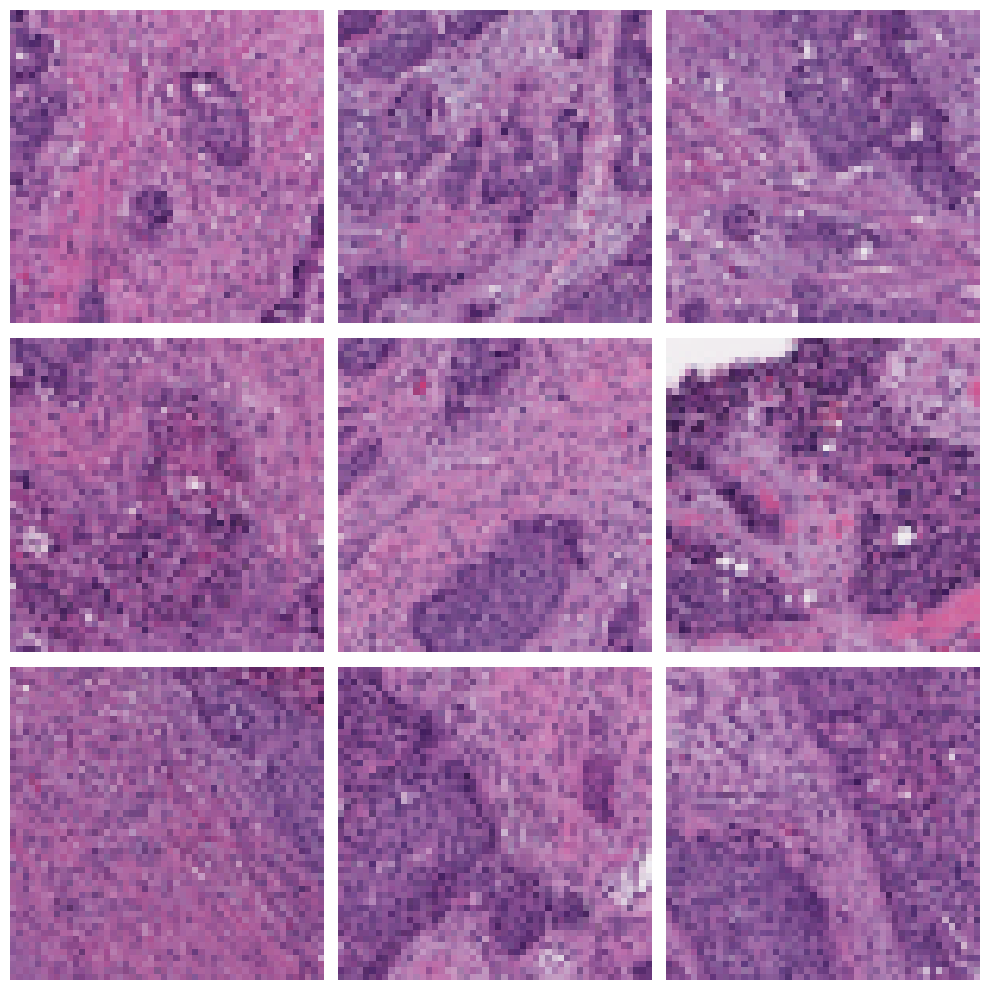

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Loop over the first 9 images (adjust range as needed)
for idx, i in enumerate(range(9)):
    # Read the image using OpenCV
    img = cv2.imread(breast_imgs[i])

    # Convert from BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Determine the row and column in the 3x3 grid
    row = idx // 3
    col = idx % 3

    # Plot the image
    axes[row, col].imshow(img_rgb)
    axes[row, col].axis('off')  # Hide axis ticks

# Display the plot
plt.tight_layout()
plt.show()


In [19]:
# Get data insights from dataframe
df = pd.DataFrame(index=np.arange(0, len(breast_imgs)), columns=['path', 'target'])
for i in range(len(breast_imgs)):
    df.loc[i, 'path'] = breast_imgs[i]
    df.loc[i, 'target'] = int(breast_imgs[i][-5])

In [20]:
df

,path,target
0,/content/breast-histopathology-images/IDC_regu...,1
1,/content/breast-histopathology-images/IDC_regu...,1
2,/content/breast-histopathology-images/IDC_regu...,1
3,/content/breast-histopathology-images/IDC_regu...,1
4,/content/breast-histopathology-images/IDC_regu...,1
...,...,...
277519,/content/breast-histopathology-images/IDC_regu...,0
277520,/content/breast-histopathology-images/IDC_regu...,0
277521,/content/breast-histopathology-images/IDC_regu...,0
277522,/content/breast-histopathology-images/IDC_regu...,0


In [21]:
pos = df[df['target'] == 1]
neg = df[df['target'] == 0]

In [23]:
pos.shape


(78786, 2)

In [24]:
neg.shape

(198738, 2)

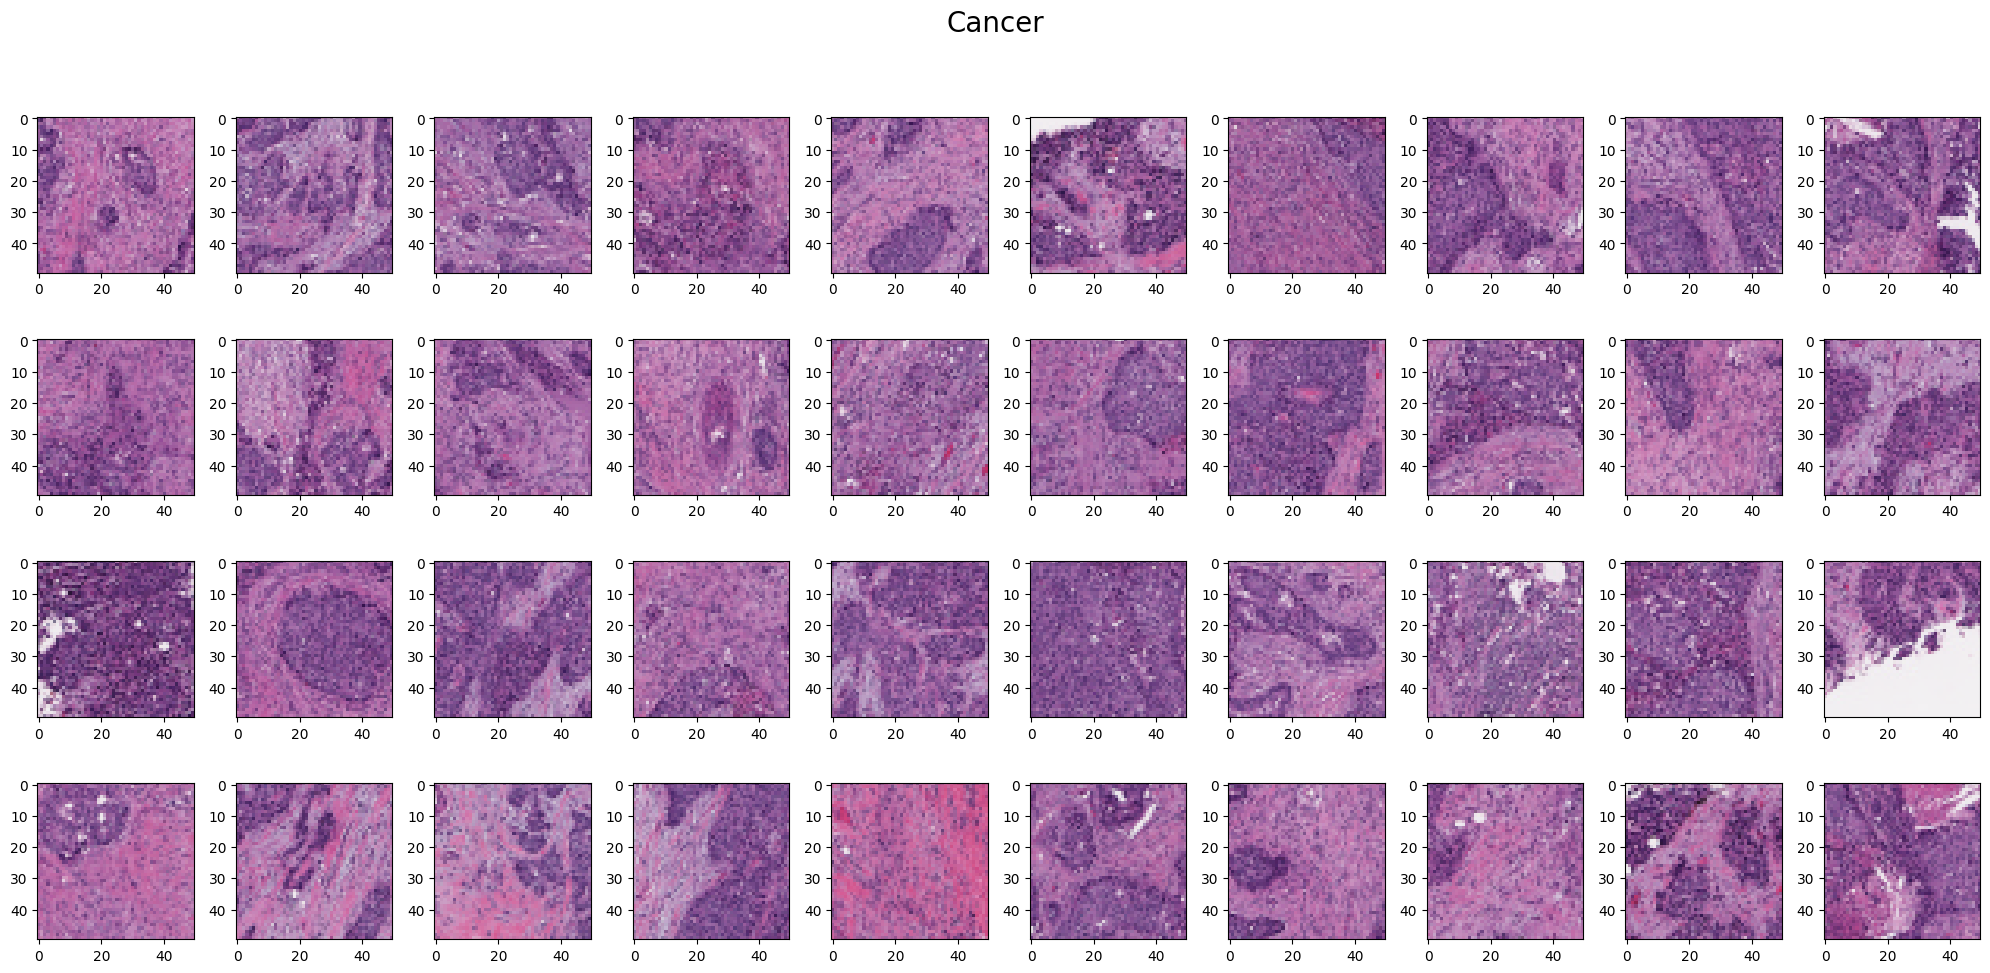

In [25]:
# print cancer images
fig, axes = plt.subplots(4, 10, figsize=(20,10))
fig.suptitle('Cancer', fontsize=20)
for i in range(4):
    for j in range(10):
        image = imread(pos.iloc[j + 10*i]["path"])
        axes[i,j].imshow(image)
plt.tight_layout(rect=[0, 0, 1, 0.96])

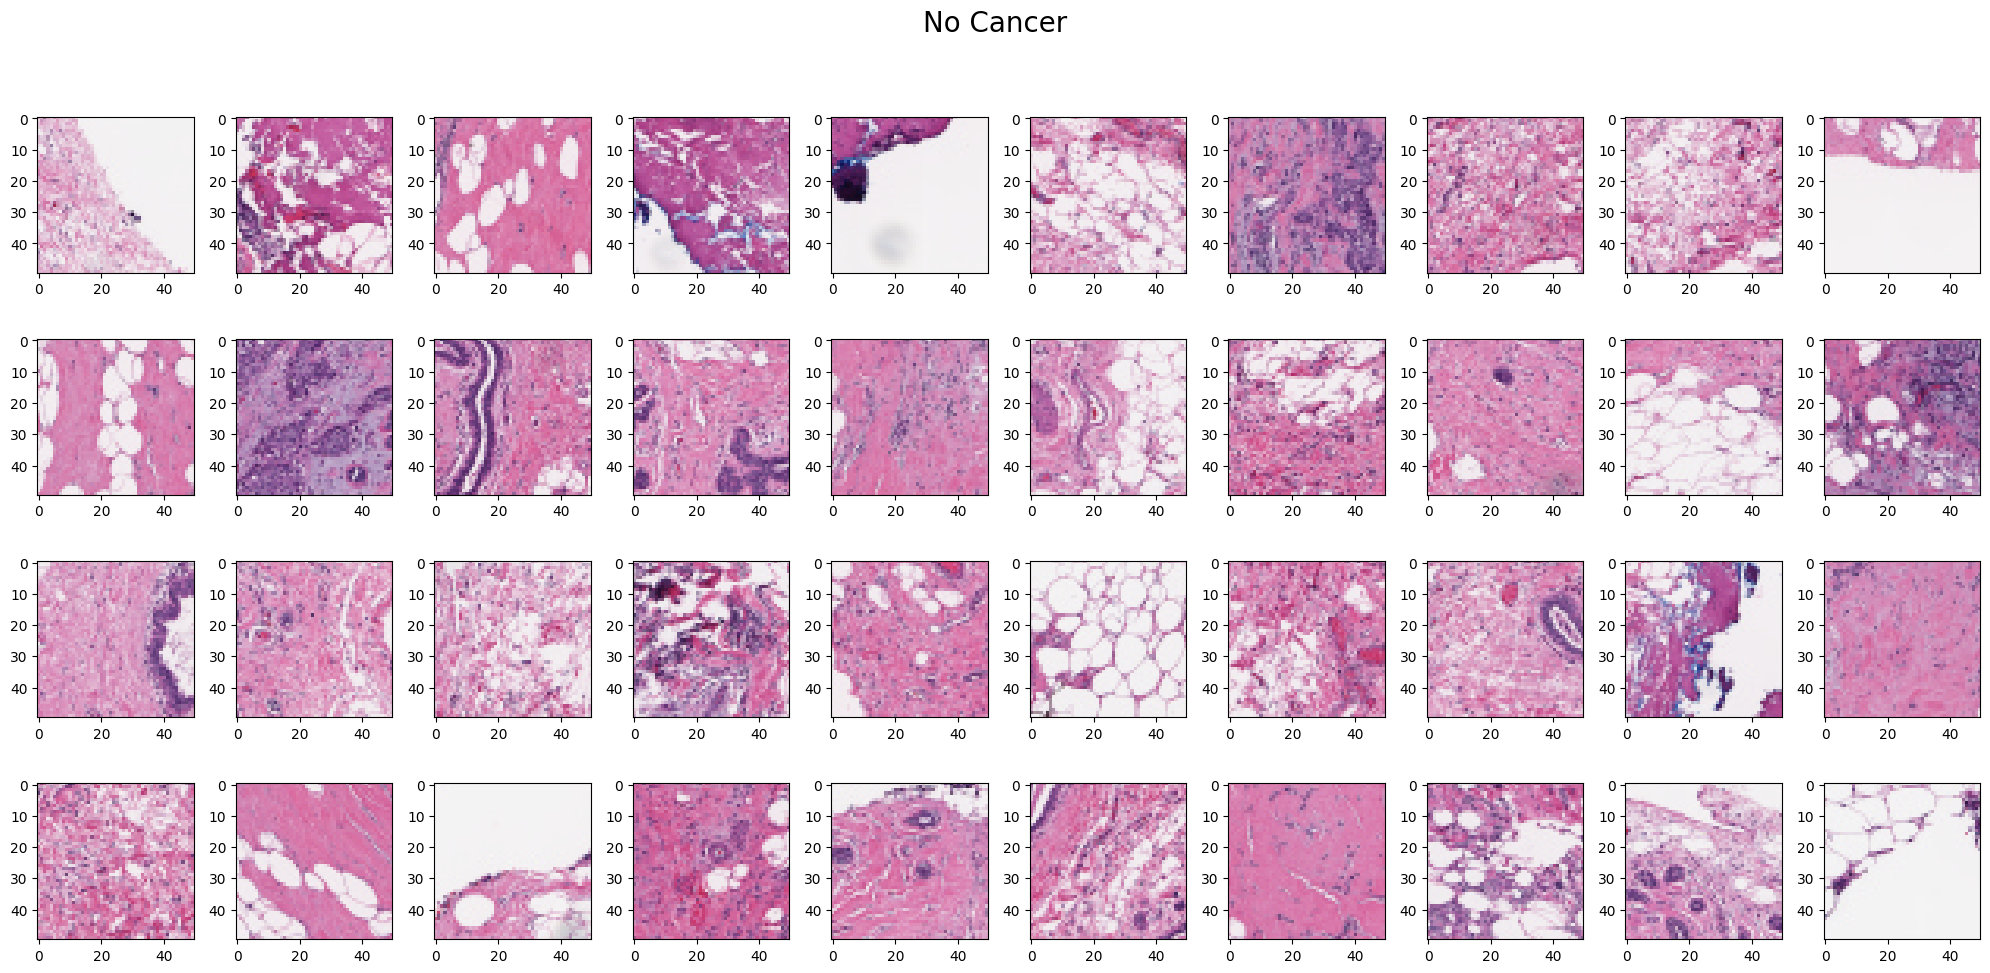

In [26]:
# print non-cancer images
fig, axes = plt.subplots(4, 10, figsize=(20,10))
fig.suptitle('No Cancer', fontsize=20)
for i in range(4):
    for j in range(10):
        image = imread(neg.iloc[j + 10*i]["path"])
        axes[i,j].imshow(image)
plt.tight_layout(rect=[0, 0, 1, 0.96])

<ipython-input-27-bdefe9b621a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df['target'].value_counts().index, y = df['target'].value_counts(), palette='Set1')


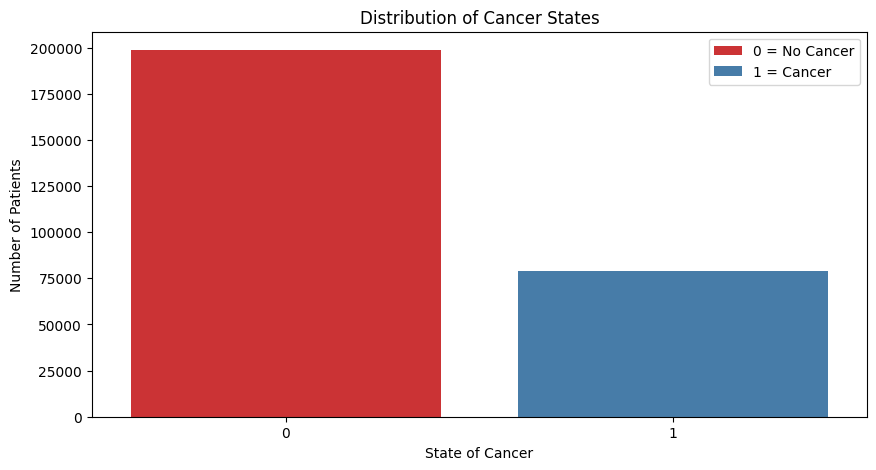

In [27]:
# insights from dataframe
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df['target'].value_counts().index, y = df['target'].value_counts(), palette='Set1')
plt.xlabel('State of Cancer')
plt.ylabel('Number of Patients')
plt.title('Distribution of Cancer States')
plt.legend(handles=ax.patches[:2], labels=['0 = No Cancer', '1 = Cancer'], loc='upper right')
plt.show()

In [28]:
pos_balanced = resample(pos, replace=True, n_samples=135000)

In [29]:
df_balanced = pd.concat([neg, pos_balanced])

# balance the dataset to look like
# neg DataFrame
#    path                target
# 0  /path/img1_0.jpg    0
# 1  /path/img2_0.jpg    0

# # pos_balanced DataFrame
#    path                target
# 0  /path/img3_1.jpg    1
# 1  /path/img4_1.jpg    1

# # df_balanced (result)
#    path                target
# 0  /path/img1_0.jpg    0
# 1  /path/img2_0.jpg    0
# 2  /path/img3_1.jpg    1
# 3  /path/img4_1.jpg    1

In [30]:
df_balanced.to_csv('balanced_dataframe.csv', index=False)

# Without index=False:
# csvCopy,path,target
# 0,/path/img1_0.jpg,0
# 1,/path/img2_0.jpg,0
# 2,/path/img3_1.jpg,1
# With index=False:
# csvCopypath,target
# /path/img1_0.jpg,0
# /path/img2_0.jpg,0
# /path/img3_1.jpg,1


In [31]:
# print balanced dataframe
df_balanced

,path,target
587,/content/breast-histopathology-images/IDC_regu...,0
588,/content/breast-histopathology-images/IDC_regu...,0
589,/content/breast-histopathology-images/IDC_regu...,0
590,/content/breast-histopathology-images/IDC_regu...,0
591,/content/breast-histopathology-images/IDC_regu...,0
...,...,...
41485,/content/breast-histopathology-images/IDC_regu...,1
9763,/content/breast-histopathology-images/IDC_regu...,1
35831,/content/breast-histopathology-images/IDC_regu...,1
5632,/content/breast-histopathology-images/IDC_regu...,1


In [32]:
values=df_balanced.values
np.random.shuffle(values)

In [33]:
X = []
y = []
# feature - (image path)
for feature, label in values:
    image = cv2.imread(feature, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (50,50), interpolation = cv2.INTER_LINEAR)
    X.append(image)
    y.append(label)
X = np.array(X)
y = np.array(y)


In [34]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# check data
print(f'X Training Data: {len(X_train)}')
print(f'X Testing Data: {len(X_test)}')

X Training Data: 266990
X Testing Data: 66748


In [35]:
# import tensorflow and sklearn modules
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.utils import to_categorical

In [36]:
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [37]:
# stopback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

# reduce learning rate on plateau
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.0001)

In [38]:
# build model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(50, 50, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 50, 50, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 50, 50, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 25, 25, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 25, 25, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,519,298 (9.61 MB)

 Trainable params: 2,518,850 (9.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# runtime disconnects on first epoch ---- fix ()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=64, callbacks=[early_stopping, lr_reduction])

Epoch 1/30
4172/4172 ━━━━━━━━━━━━━━━━━━━━ 2073s 496ms/step - accuracy: 0.7601 - loss: 0.5937 - val_accuracy: 0.7945 - val_loss: 0.4420 - learning_rate: 0.0010
Epoch 2/30
4172/4172 ━━━━━━━━━━━━━━━━━━━━ 2059s 481ms/step - accuracy: 0.8127 - loss: 0.4347 - val_accuracy: 0.8146 - val_loss: 0.4464 - learning_rate: 0.0010
Epoch 3/30
 569/4172 ━━━━━━━━━━━━━━━━━━━━ 27:17 454ms/step - accuracy: 0.8229 - loss: 0.4135

In [ ]:
y_pred = model.predict(X_test)
y_test = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

In [ ]:
confusion_mtx = confusion_matrix(y_test, y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import save_model
model.save('breast_cancer_model.h5')